In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import scipy.stats as stats 

E:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#get covid test result
df_covid=pd.read_table('../NSinternship/covid19_result_0806.by_eid')

In [3]:
display(df_covid)

,eid,#tests,#positive_test,final_result,final_date
0,1000011,1,0,0,2020/05/11
1,1001244,1,0,0,2020/03/21
2,1001283,1,0,0,2020/06/02
3,1001505,2,0,0,2020/07/10
4,1001772,1,0,0,2020/05/08
...,...,...,...,...,...
13497,6021157,1,0,0,2020/03/27
13498,6022249,1,0,0,2020/07/10
13499,6022684,1,0,0,2020/05/26
13500,6023646,4,0,0,2020/07/06


In [4]:
#get all eids with covid positive test
eid_positive=list(df_covid['eid'][df_covid['final_result']==1])

In [5]:
#total number of subjects with covid positive results
len(eid_positive)

1650

In [6]:
data = pd.read_csv("../NSinternship/Covid_information_20-08-18.csv")

In [7]:
data.head()

,eid,31-0.0,34-0.0,52-0.0,93-0.0,93-0.1,93-1.0,93-1.1,93-2.0,93-2.1,...,100025-0.0,100025-1.0,100025-2.0,100025-3.0,100025-4.0,104670-0.0,104670-1.0,104670-2.0,104670-3.0,104670-4.0
0,1000011,0,1953,8,NaN,NaN,NaN,NaN,NaN,NaN,...,19.73,NaN,5.99,NaN,NaN,0.0,NaN,0.0,NaN,NaN
1,1001244,1,1940,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,16.87,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2,1001283,1,1943,10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1001505,1,1952,5,150.0,144.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1001772,1,1966,9,NaN,NaN,NaN,NaN,164.0,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Field 31: Sex

In [8]:
sex = data[['eid','31-0.0']]
sex = sex.rename(columns = {'31-0.0': 'Sex'}, inplace = False)
display(sex)

,eid,Sex
0,1000011,0
1,1001244,1
2,1001283,1
3,1001505,1
4,1001772,1
...,...,...
13497,6021157,1
13498,6022249,1
13499,6022684,1
13500,6023646,1


In [9]:
male = sex['Sex'].astype(bool).sum(axis=0)/sex['Sex'].count()
female = 1 - male
print("The percentage of male patients is {} and of female patients is {}".format(male, female))

The percentage of male patients is 0.4870389571915272 and of female patients is 0.5129610428084728


In [10]:
infectionRate_male=sex['eid'][sex['eid'].isin(eid_positive)][sex['Sex']==1].count()/sex['eid'][sex['Sex']==1].count()
infectionRate_female=sex['eid'][sex['eid'].isin(eid_positive)][sex['Sex']==0].count()/sex['eid'][sex['Sex']==0].count()
print("The infection rage in male subject is {} and in female subjects is {}".format(infectionRate_male, infectionRate_female))

The infection rage in male subject is 0.13108272506082724 and in female subjects is 0.11377418423332371


In [11]:
numberPositive_male=sex['eid'][sex['eid'].isin(eid_positive)][sex['Sex']==1].count()
numberNegative_male=sex['eid'][~sex['eid'].isin(eid_positive)][sex['Sex']==1].count()
numberPositive_female=sex['eid'][sex['eid'].isin(eid_positive)][sex['Sex']==0].count()
numberNegative_female=sex['eid'][~sex['eid'].isin(eid_positive)][sex['Sex']==0].count()
odd, p = stats.fisher_exact([[numberPositive_male, numberNegative_male], [numberPositive_female, numberNegative_female]])

print('Gender\tpositive\tnegative')
print('Male\t{}      \t{}'.format(numberPositive_male,numberNegative_male))
print('feMale\t{}      \t{}'.format(numberPositive_female,numberNegative_female))
print('The odd ration of infection in male to infection in female is {} and p value is {}'.format(odd,p))

Gender	positive	negative
Male	862      	5714
feMale	788      	6138
The odd ration of infection in male to infection in female is 1.1750807083501382 and p value is 0.002288659054526205


### Data Field 34: Age

In [12]:
bday = data[['eid','34-0.0', '52-0.0']]
bday = bday.rename(columns = {'34-0.0': 'Year', '52-0.0': 'Month'}, inplace = False)
display(bday)

,eid,Year,Month
0,1000011,1953,8
1,1001244,1940,1
2,1001283,1943,10
3,1001505,1952,5
4,1001772,1966,9
...,...,...,...
13497,6021157,1940,1
13498,6022249,1958,3
13499,6022684,1965,3
13500,6023646,1942,7


In [13]:
bday['Date'] = pd.to_datetime(bday[['Year', 'Month']].assign(DAY=1)) # ignoring the date and default as 1
display(bday)

,eid,Year,Month,Date
0,1000011,1953,8,1953-08-01
1,1001244,1940,1,1940-01-01
2,1001283,1943,10,1943-10-01
3,1001505,1952,5,1952-05-01
4,1001772,1966,9,1966-09-01
...,...,...,...,...
13497,6021157,1940,1,1940-01-01
13498,6022249,1958,3,1958-03-01
13499,6022684,1965,3,1965-03-01
13500,6023646,1942,7,1942-07-01


In [14]:
from datetime import datetime
from datetime import date

def calculate_age(birth):
    birth = datetime.strptime(birth, "%Y-%m-%d").date()
    today = date.today()
    if birth.month > today.month:
        age = today.year - birth.year - 1
    else: 
        age = today.year - birth.year
    return age

bday['Date'] = bday.Date.dt.strftime("%Y-%m-%d")
bday['Age'] = bday['Date'].apply(calculate_age)
display(bday)

,eid,Year,Month,Date,Age
0,1000011,1953,8,1953-08-01,67
1,1001244,1940,1,1940-01-01,80
2,1001283,1943,10,1943-10-01,76
3,1001505,1952,5,1952-05-01,68
4,1001772,1966,9,1966-09-01,53
...,...,...,...,...,...
13497,6021157,1940,1,1940-01-01,80
13498,6022249,1958,3,1958-03-01,62
13499,6022684,1965,3,1965-03-01,55
13500,6023646,1942,7,1942-07-01,78


In [15]:
np.average(bday['Age'])

69.30284402310768

The average age of all the patients is 69.30284402310768
The average age of covid positive patients is 67.71030303030302
The average age of covid negative patients is 69.52455281808977


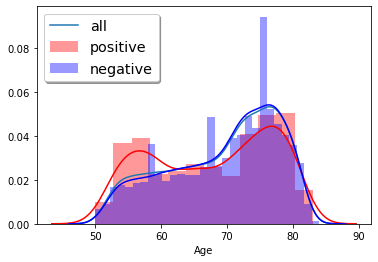

<Figure size 432x288 with 0 Axes>

In [63]:
print("The average age of all the patients is {}".format(np.average(bday['Age'])))
print("The average age of covid positive patients is {}".format(np.average(bday['Age'][bday['eid'].isin(eid_positive)])))
print("The average age of covid negative patients is {}".format(np.average(bday['Age'][~bday['eid'].isin(eid_positive)])))
ax=sns.distplot(bday['Age'],label='all',hist=False)
ax=sns.distplot(bday['Age'][bday['eid'].isin(eid_positive)], color='red',label='positive',hist=True)
ax=sns.distplot(bday['Age'][~bday['eid'].isin(eid_positive)],color='blue',label='negative',hist=True)
legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')

plt.show()
plt.savefig("Covid_information_age_distribution.png")
# From the plot, the patients' ages are mostly centered around 70-80.

In [17]:
#compare infection rate in different decades (divided into three grups, <60, 60-70, >=70)
numberPositive_less60=bday['Age'][bday['eid'].isin(eid_positive)][bday['Age']<60].count()
numberNegative_less60=bday['Age'][~bday['eid'].isin(eid_positive)][bday['Age']<60].count()
numberPositive_less70=bday['Age'][bday['eid'].isin(eid_positive)][(bday['Age']>=60) & (bday['Age']<70)].count()
numberNegative_less70=bday['Age'][~bday['eid'].isin(eid_positive)][(bday['Age']>=60) & (bday['Age']<70)].count()
numberPositive_above70=bday['Age'][bday['eid'].isin(eid_positive)][bday['Age']>=70].count()
numberNegative_above70=bday['Age'][~bday['eid'].isin(eid_positive)][bday['Age']>=70].count()

print('Age\tpositive\tnegative')
print('<60\t{}     \t{}'.format(numberPositive_less60,numberNegative_less60))
print('60-70\t{}     \t{}'.format(numberPositive_less70,numberNegative_less70))
print('>=70\t{}     \t{}'.format(numberPositive_above70,numberNegative_above70))

#odd and p compare to middle group (age between 60 and 70)
odd, p = stats.fisher_exact([[numberPositive_less60, numberNegative_less60], [numberPositive_less70, numberNegative_less70]])
print('The odd ration of infection at the age <60 to infection at the age 60-70 is {} and p value is {}'.format(odd,p))

odd, p = stats.fisher_exact([[numberPositive_above70, numberNegative_above70], [numberPositive_less70, numberNegative_less70]])
print('The odd ration of infection at the age >70 to infection at the age 60-70 is {} and p value is {}'.format(odd,p))


Age	positive	negative
<60	442     	1890
60-70	400     	3127
>=70	808     	6835
The odd ration of infection at the age <60 to infection at the age 60-70 is 1.8282195767195768 and p value is 9.899762221032685e-16
The odd ration of infection at the age >70 to infection at the age 60-70 is 0.9241463057790783 and p value is 0.22538976800248373


### Data Field 21001: Body mass index (BMI)

In [18]:
filter_col21001 = [col for col in data if col.startswith('21001')]
filter_col21001.insert(0, 'eid')
filter_col21001

['eid', '21001-0.0', '21001-1.0', '21001-2.0', '21001-3.0']

In [19]:
bmi = data[filter_col21001]
bmi = bmi.rename(columns = {'21001-0.0': 'Instance 0', '21001-1.0': 'Instance 1', '21001-2.0' : 'Instance 2', '21001-3.0' : 'Instance 3'}, inplace = False)
display(bmi)

,eid,Instance 0,Instance 1,Instance 2,Instance 3
0,1000011,27.7381,NaN,NaN,NaN
1,1001244,24.8356,NaN,NaN,NaN
2,1001283,32.3028,NaN,NaN,NaN
3,1001505,28.4485,NaN,NaN,NaN
4,1001772,27.2527,NaN,28.2183,NaN
...,...,...,...,...,...
13497,6021157,30.0692,NaN,NaN,NaN
13498,6022249,23.9198,NaN,NaN,NaN
13499,6022684,21.0220,NaN,20.6824,NaN
13500,6023646,30.0617,NaN,NaN,NaN


#### Set a standard for overweight

In [20]:
overweight = 25
obese = 30
underweight = 18.5

In [21]:
ob = bmi['Instance 0'] > obese
ow = bmi['Instance 0'] > overweight
uw = bmi['Instance 0'] < underweight

In [22]:
obcount = ob.sum()/bmi['Instance 0'].count()
owcount = (ow.sum() - ob.sum())/bmi['Instance 0'].count()
uwcount = uw.sum()/bmi['Instance 0'].count()
normal = 1 - obcount - owcount - uwcount

print("The percentage of obese patients, overweight patients and underweight patients are respectively {}, {} and {}; The percentage of normal weighted patients is only {}.".format(obcount, owcount, uwcount, normal))

The percentage of obese patients, overweight patients and underweight patients are respectively 0.30736416704086217, 0.41386020056877715 and 0.005014219428229307; The percentage of normal weighted patients is only 0.2737614129621313.


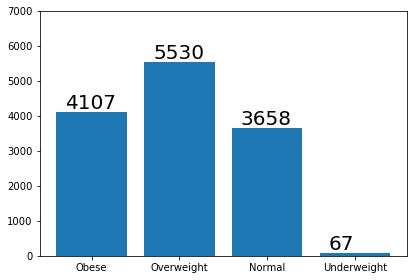

In [23]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.85,0.85])
x = ['Obese', 'Overweight', 'Normal', 'Underweight']
y = [ob.sum(), ow.sum() - ob.sum(), bmi['Instance 0'].count() - (ow.sum() + uw.sum()), uw.sum()]
ax.bar(x, y)
axes = plt.gca()
axes.set_ylim([0,7000])
xlocs, xlabs = plt.xticks()
xlocs=[i+1 for i in range(0,4)]
for i, v in enumerate(y):
    ax.text(xlocs[i] - 1.3, v + 100, str(v), fontsize = 20)
plt.savefig("Covid_information_bmi.png")

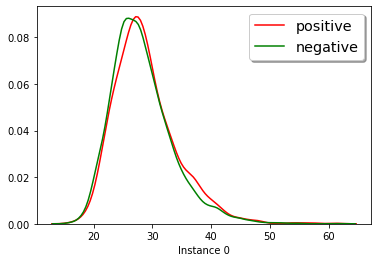

<Figure size 432x288 with 0 Axes>

In [24]:
#BMI distribution in covid positive and negative
ax=sns.distplot(bmi['Instance 0'][bmi['eid'].isin(eid_positive)], color='red',label='positive',hist=False)
ax=sns.distplot(bmi['Instance 0'][~bmi['eid'].isin(eid_positive)],color='green',label='negative',hist=False)
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')

plt.show()
plt.savefig("Covid_BMI_distribution.png")

In [25]:
#in the figure, for subjects with BMI>5, they may have significant increase of risk, then we can define >35 as severe ob
numberPositive_nr=bmi['eid'][bmi['eid'].isin(eid_positive)][(bmi['Instance 0']>=18.5) & (bmi['Instance 0']<25)].count()
numberNegative_nr=bmi['eid'][~bmi['eid'].isin(eid_positive)][(bmi['Instance 0']>=18.5) & (bmi['Instance 0']<25)].count()

numberPositive_ow=bmi['eid'][bmi['eid'].isin(eid_positive)][(bmi['Instance 0']>=25) & (bmi['Instance 0']<30)].count()
numberNegative_ow=bmi['eid'][~bmi['eid'].isin(eid_positive)][(bmi['Instance 0']>=25) & (bmi['Instance 0']<30)].count()
                                                     
numberPositive_ob=bmi['eid'][bmi['eid'].isin(eid_positive)][(bmi['Instance 0']>=30) & (bmi['Instance 0']<35)].count()
numberNegative_ob=bmi['eid'][~bmi['eid'].isin(eid_positive)][(bmi['Instance 0']>=30) & (bmi['Instance 0']<35)].count()  

numberPositive_so=bmi['eid'][bmi['eid'].isin(eid_positive)][bmi['Instance 0']>=35].count()
numberNegative_so=bmi['eid'][~bmi['eid'].isin(eid_positive)][bmi['Instance 0']>=35].count()
                                                     
numberPositive_uw=bmi['eid'][bmi['eid'].isin(eid_positive)][bmi['Instance 0']<18.5].count()
numberNegative_uw=bmi['eid'][~bmi['eid'].isin(eid_positive)][bmi['Instance 0']<18.5].count()

print('BMI\t\tpositive\tnegative')
print('Underweight\t{}       \t{}'.format(numberPositive_uw,numberNegative_uw))
print('Normal     \t{}      \t{}'.format(numberPositive_nr,numberNegative_nr))
print('Overweight \t{}      \t{}'.format(numberPositive_ow,numberNegative_ow))
print('Obese      \t{}      \t{}'.format(numberPositive_ob,numberNegative_ob))
print('SevereOb   \t{}      \t{}'.format(numberPositive_so,numberNegative_so))

#odd and p compare to normal group
odd, p = stats.fisher_exact([[numberPositive_uw, numberNegative_uw], [numberPositive_nr, numberNegative_nr]])
print('The odd ration of infection with underweight to infection with normal weight is {} and p value is {}'.format(odd,p))

odd, p = stats.fisher_exact([[numberPositive_ow, numberNegative_ow], [numberPositive_nr, numberNegative_nr]])
print('The odd ration of infection with overweight to infection with normal weight is {} and p value is {}'.format(odd,p))

odd, p = stats.fisher_exact([[numberPositive_ob, numberNegative_ob], [numberPositive_nr, numberNegative_nr]])
print('The odd ration of infection with obese to infection with normal weight is {} and p value is {}'.format(odd,p))

odd, p = stats.fisher_exact([[numberPositive_so, numberNegative_so], [numberPositive_nr, numberNegative_nr]])
print('The odd ration of infection with severe obese to infection with normal weight is {} and p value is {}'.format(odd,p))

BMI		positive	negative
Underweight	7       	60
Normal     	389      	3269
Overweight 	692      	4837
Obese      	339      	2421
SevereOb   	204      	1144
The odd ration of infection with underweight to infection with normal weight is 0.9804198800342759 and p value is 1.0
The odd ration of infection with overweight to infection with normal weight is 1.202251496471341 and p value is 0.006052381207479848
The odd ration of infection with obese to infection with normal weight is 1.1767121236736398 and p value is 0.04256480994314843
The odd ration of infection with severe obese to infection with normal weight is 1.4985438725798623 and p value is 2.1308033246654124e-05


#### Revisit counts

In [26]:
print("There were only {} patients did a first repeat assessment visit, {} patients did the second and {} patients did the third; Out of all of these returning patients, the average bmis are respectively {}, {} and {}.".format(bmi['Instance 1'].count(), bmi['Instance 2'].count(), bmi['Instance 3'].count(), bmi['Instance 1'].mean(), bmi['Instance 2'].mean(), bmi['Instance 3'].mean()))

There were only 498 patients did a first repeat assessment visit, 1057 patients did the second and 52 patients did the third; Out of all of these returning patients, the average bmis are respectively 28.034085943775125, 27.42890671712396 and 25.566469230769233.


### Data-Field 20116 : Smoking Status

In [31]:
#smoking status, using first survey value
data['20116-0.0'].unique()

array([ 0.,  2.,  1., -3., nan])

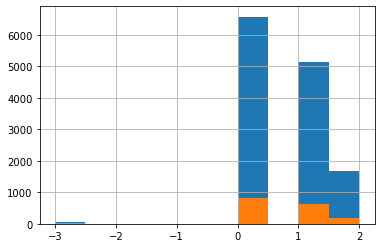

In [37]:
smoking_all=data['20116-0.0'].hist()
smoking_positive=data['20116-0.0'][data['eid'].isin(eid_positive)].hist()

In [43]:
infection_positive_never=data['eid'][data['20116-0.0']==0][data['eid'].isin(eid_positive)].count()
infection_negative_never=data['eid'][data['20116-0.0']==0][~data['eid'].isin(eid_positive)].count()

infection_positive_previous=data['eid'][data['20116-0.0']==1][data['eid'].isin(eid_positive)].count()
infection_negative_previous=data['eid'][data['20116-0.0']==1][~data['eid'].isin(eid_positive)].count()

infection_positive_current=data['eid'][data['20116-0.0']==2][data['eid'].isin(eid_positive)].count()
infection_negative_current=data['eid'][data['20116-0.0']==2][~data['eid'].isin(eid_positive)].count()

print('Smoking_status\tpositive\tnegative')
print('Never     \t{}       \t{}'.format(infection_positive_never,infection_negative_never))
print('Previous     \t{}      \t{}'.format(infection_positive_previous,infection_negative_previous))
print('Current \t{}      \t{}'.format(infection_positive_current,infection_negative_current))


#odd and p compare to never smoking group
odd, p = stats.fisher_exact([[infection_positive_previous,infection_negative_previous], [infection_positive_never,infection_negative_never]])
print('The odd ration of infection with previous smoking to infection with never smoking is {} and p value is {}'.format(odd,p))

odd, p = stats.fisher_exact([[infection_positive_current,infection_negative_current], [infection_positive_never,infection_negative_never]])
print('The odd ration of infection with current smoking to infection with never smoking is {} and p value is {}'.format(odd,p))


Smoking_status	positive	negative
Never     	806       	5774
Previous     	640      	4505
Current 	186      	1488
The odd ration of infection with previous smoking to infection with never smoking is 1.0177167360225612 and p value is 0.755671613966634
The odd ration of infection with current smoking to infection with never smoking is 0.8954714640198511 and p value is 0.20687127442376438


### Data-Field 20117 : Alcohol drinker status

In [24]:
#drinking status, using first survey value
data['20117-0.0'].unique()

array([ 2.,  1.,  0., -3., nan])

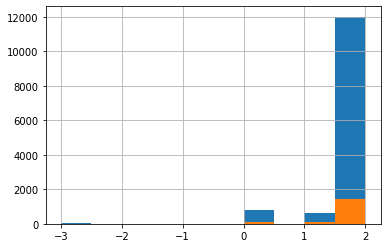

In [21]:
smoking_all=data['20117-0.0'].hist()
smoking_positive=data['20117-0.0'][data['eid'].isin(eid_positive)].hist()

In [23]:
infection_positive_never=data['eid'][data['20117-0.0']==0][data['eid'].isin(eid_positive)].count()
infection_negative_never=data['eid'][data['20117-0.0']==0][~data['eid'].isin(eid_positive)].count()

infection_positive_previous=data['eid'][data['20117-0.0']==1][data['eid'].isin(eid_positive)].count()
infection_negative_previous=data['eid'][data['20117-0.0']==1][~data['eid'].isin(eid_positive)].count()

infection_positive_current=data['eid'][data['20117-0.0']==2][data['eid'].isin(eid_positive)].count()
infection_negative_current=data['eid'][data['20117-0.0']==2][~data['eid'].isin(eid_positive)].count()

print('Drinking_status\tpositive\tnegative')
print('Never     \t{}       \t{}'.format(infection_positive_never,infection_negative_never))
print('Previous     \t{}      \t{}'.format(infection_positive_previous,infection_negative_previous))
print('Current \t{}      \t{}'.format(infection_positive_current,infection_negative_current))


#odd and p compare to never smoking group
odd, p = stats.fisher_exact([[infection_positive_previous,infection_negative_previous], [infection_positive_never,infection_negative_never]])
print('The odd ration of infection with previous drinking to infection with never drink alcohol is {} and p value is {}'.format(odd,p))

odd, p = stats.fisher_exact([[infection_positive_current,infection_negative_current], [infection_positive_never,infection_negative_never]])
print('The odd ration of infection with current drinking to infection with never drink alcohol is {} and p value is {}'.format(odd,p))


Drinking_status	positive	negative
Never     	125       	648
Previous     	83      	570
Current 	1433      	10571
The odd ration of infection with previous drinking to infection with never drink alcohol is 0.7548631578947368 and p value is 0.07076890962344695
The odd ration of infection with current drinking to infection with never drink alcohol is 0.7027407057042853 and p value is 0.0007968476520775658


### Data-Field 22037 - 22039 : MET minutes per week for walking

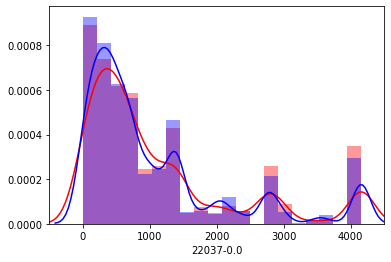

In [67]:
#MET minutes per week for walking
ax=sns.distplot(data['22037-0.0'][data['eid'].isin(eid_positive)], color='red',label='positive',hist=True,bins=20)
ax=sns.distplot(data['22037-0.0'][~data['eid'].isin(eid_positive)], color='blue',label='negative',hist=True,bins=20)
plt.xlim([-500, 4500])
plt.show()

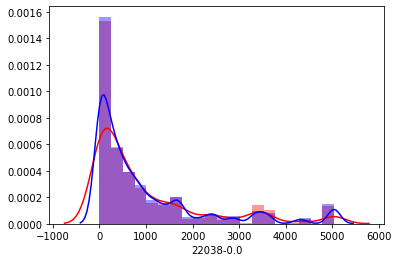

In [56]:
#MET minutes per week for moderate activity
ax=sns.distplot(data['22038-0.0'][data['eid'].isin(eid_positive)], color='red',label='positive',hist=True,bins=20)
ax=sns.distplot(data['22038-0.0'][~data['eid'].isin(eid_positive)], color='blue',label='negative',hist=True,bins=20)
plt.show()

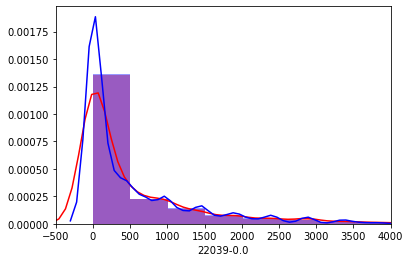

In [64]:
#MET minutes per week for vigorous activity
ax=sns.distplot(data['22039-0.0'][data['eid'].isin(eid_positive)], color='red',label='positive',hist=True,bins=20)
ax=sns.distplot(data['22039-0.0'][~data['eid'].isin(eid_positive)], color='blue',label='negative',hist=True,bins=20)
plt.xlim([-500, 4000])
plt.show()

### Data-Field 22601

In [27]:
filter_col22601 = [col for col in data if col.startswith('22601')]
filter_col22601.insert(0, 'eid')
filter_col22601

['eid',
 '22601-0.0',
 '22601-0.1',
 '22601-0.2',
 '22601-0.3',
 '22601-0.4',
 '22601-0.5',
 '22601-0.6',
 '22601-0.7',
 '22601-0.8',
 '22601-0.9',
 '22601-0.10',
 '22601-0.11',
 '22601-0.12',
 '22601-0.13',
 '22601-0.14',
 '22601-0.15',
 '22601-0.16',
 '22601-0.17',
 '22601-0.18',
 '22601-0.19',
 '22601-0.20',
 '22601-0.21',
 '22601-0.22',
 '22601-0.23',
 '22601-0.24',
 '22601-0.25',
 '22601-0.26',
 '22601-0.27',
 '22601-0.28',
 '22601-0.29',
 '22601-0.30',
 '22601-0.31',
 '22601-0.32',
 '22601-0.33',
 '22601-0.34',
 '22601-0.35',
 '22601-0.36',
 '22601-0.37',
 '22601-0.38',
 '22601-0.39']

In [28]:
employment = data[filter_col22601]

,eid,22601-0.0,22601-0.1,22601-0.2,22601-0.3,22601-0.4,22601-0.5,22601-0.6,22601-0.7,22601-0.8,...,22601-0.30,22601-0.31,22601-0.32,22601-0.33,22601-0.34,22601-0.35,22601-0.36,22601-0.37,22601-0.38,22601-0.39
0,1000011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1001244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1001283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1001505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1001772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13497,6021157,21233041.0,21233041.0,11323222.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13498,6022249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13499,6022684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13500,6023646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data-Field 20084: Vitamin

In [8]:
filter_vitamin = [col for col in data if col.startswith(('20084','100012', '100013', '100015', '100021', '100025', '104670'))]
filter_vitamin.insert(0, 'eid')

In [9]:
vitamin = data[filter_vitamin]
vitamin.head()

,eid,20084-0.0,20084-0.1,20084-0.2,20084-0.3,20084-0.4,20084-0.5,20084-0.6,20084-0.7,20084-0.8,...,100025-0.0,100025-1.0,100025-2.0,100025-3.0,100025-4.0,104670-0.0,104670-1.0,104670-2.0,104670-3.0,104670-4.0
0,1000011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.73,NaN,5.99,NaN,NaN,0.0,NaN,0.0,NaN,NaN
1,1001244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,16.87,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2,1001283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1001505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1001772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
vitamin = vitamin.dropna(axis='columns', how = 'all')

#### Get odd ratios and p values of infection rates based on each supplement options

In [13]:
# Was originally only using the first instance: 20084-0.~, but the sample size is too small to get our data accurate.
# There might be problems caused by using all the instances.
filter_20084 = [col for col in vitamin if col.startswith('20084')]
filter_20084.insert(0, 'eid')

In [14]:
vitamin0 = vitamin[filter_20084]
vitamin0.count()

eid           13502
20084-0.0       704
20084-0.1       438
20084-0.2       229
20084-0.3       127
              ...  
20084-4.10        6
20084-4.11        3
20084-4.12        1
20084-4.13        1
20084-4.14        1
Length: 88, dtype: int64

In [15]:
coding74 = pd.read_csv("../NSinternship/data_coding/coding74.tsv", sep="\t")
coding74

,coding,meaning
0,468,Multivitamin
1,469,Multivitamin with iron
2,470,Multivitamin with calcium
3,471,Multivitamin with multimineral
4,472,Fish oil
5,473,Glucosamine/chondroitin
6,474,Evening primrose
7,475,Vitamin A
8,476,Vitamin B6
9,477,Vitamin B12


In [104]:
infection_positive_multivit_iron = 0
infection_negative_multivit_iron = 0
infection_positive_multivit_cal = 0
infection_negative_multivit_cal = 0
infection_positive_multivit_multimin = 0
infection_negative_multivit_multimin = 0
infection_positive_fishoil = 0
infection_negative_fishoil = 0
infection_positive_gluc = 0
infection_negative_gluc = 0
infection_positive_even_prim = 0
infection_negative_even_prim = 0
infection_positive_vita = 0
infection_negative_vita = 0
infection_positive_vitb6 = 0
infection_negative_vitb6 = 0
infection_positive_vitb12 = 0
infection_negative_vitb12 = 0
infection_positive_vitc = 0
infection_negative_vitc = 0
infection_positive_vitd = 0
infection_negative_vitd = 0
infection_positive_vite = 0
infection_negative_vite = 0
infection_positive_folicacid = 0
infection_negative_folicacid = 0
infection_positive_chrom = 0
infection_negative_chrom = 0
infection_positive_mag = 0
infection_negative_mag = 0
infection_positive_sele = 0
infection_negative_sele = 0
infection_positive_cal = 0
infection_negative_cal = 0
infection_positive_iron = 0
infection_negative_iron = 0
infection_positive_zinc = 0
infection_negative_zinc = 0
infection_positive_other = 0
infection_negative_other = 0

# Infection Rate of those take nothing
nans = vitamin0[vitamin0.drop('eid',1).isnull().all(axis=1)]
infection_positive_nothing = vitamin0['eid'][data['eid'].isin(eid_positive)].count()
infection_negative_nothing = vitamin0['eid'][~data['eid'].isin(eid_positive)].count()

# Multivitamin
infection_positive_multivit = vitamin0['eid'][vitamin0['20084-0.0'] == 468][data['eid'].isin(eid_positive)].count()
infection_negative_multivit = vitamin0['eid'][vitamin0['20084-0.0'] == 468][~data['eid'].isin(eid_positive)].count()

# Multivitamin with iron
for (i, columnData) in vitamin0.iteritems():
    infection_positive_multivit_iron += vitamin0['eid'][vitamin0[i] == 469][data['eid'].isin(eid_positive)].count()
    infection_negative_multivit_iron += vitamin0['eid'][vitamin0[i] == 469][~data['eid'].isin(eid_positive)].count()

# Multivitamin with calcium
for (i, columnData) in vitamin0.iteritems():
    infection_positive_multivit_cal += vitamin0['eid'][vitamin0[i] == 470][data['eid'].isin(eid_positive)].count()
    infection_negative_multivit_cal += vitamin0['eid'][vitamin0[i] == 470][~data['eid'].isin(eid_positive)].count()

# Multivitamin with multimineral
for (i, columnData) in vitamin0.iteritems():
    infection_positive_multivit_multimin += vitamin0['eid'][vitamin0[i] == 471][data['eid'].isin(eid_positive)].count()
    infection_negative_multivit_multimin += vitamin0['eid'][vitamin0[i] == 471][~data['eid'].isin(eid_positive)].count()

# Fish oil
for (i, columnData) in vitamin0.iteritems():
    infection_positive_fishoil += vitamin0['eid'][vitamin0[i] == 472][data['eid'].isin(eid_positive)].count()
    infection_negative_fishoil += vitamin0['eid'][vitamin0[i] == 472][~data['eid'].isin(eid_positive)].count()
    
# Glucosamine/chondroitin
for (i, columnData) in vitamin0.iteritems():
    infection_positive_gluc += vitamin0['eid'][vitamin0[i] == 473][data['eid'].isin(eid_positive)].count()
    infection_negative_gluc += vitamin0['eid'][vitamin0[i] == 473][~data['eid'].isin(eid_positive)].count()
    
# Evening primrose
for (i, columnData) in vitamin0.iteritems():
    infection_positive_even_prim += vitamin0['eid'][vitamin0[i] == 474][data['eid'].isin(eid_positive)].count()
    infection_negative_even_prim += vitamin0['eid'][vitamin0[i] == 474][~data['eid'].isin(eid_positive)].count()
    
# Vitamin A
for (i, columnData) in vitamin0.iteritems():
    infection_positive_vita += vitamin0['eid'][vitamin0[i] == 475][data['eid'].isin(eid_positive)].count()
    infection_negative_vita += vitamin0['eid'][vitamin0[i] == 475][~data['eid'].isin(eid_positive)].count()
    
# Vitamin B6
for (i, columnData) in vitamin0.iteritems():
    infection_positive_vitb6 += vitamin0['eid'][vitamin0[i] == 476][data['eid'].isin(eid_positive)].count()
    infection_negative_vitb6 += vitamin0['eid'][vitamin0[i] == 476][~data['eid'].isin(eid_positive)].count()
    
# Vitamin B12
for (i, columnData) in vitamin0.iteritems():
    infection_positive_vitb12 += vitamin0['eid'][vitamin0[i] == 477][data['eid'].isin(eid_positive)].count()
    infection_negative_vitb12 += vitamin0['eid'][vitamin0[i] == 477][~data['eid'].isin(eid_positive)].count()
    
# Vitamin C
for (i, columnData) in vitamin0.iteritems():
    infection_positive_vitc += vitamin0['eid'][vitamin0[i] == 478][data['eid'].isin(eid_positive)].count()
    infection_negative_vitc += vitamin0['eid'][vitamin0[i] == 478][~data['eid'].isin(eid_positive)].count()
    
# Vitamin D
for (i, columnData) in vitamin0.iteritems():
    infection_positive_vitd += vitamin0['eid'][vitamin0[i] == 479][data['eid'].isin(eid_positive)].count()
    infection_negative_vitd += vitamin0['eid'][vitamin0[i] == 479][~data['eid'].isin(eid_positive)].count()
    
# Vitamin E
for (i, columnData) in vitamin0.iteritems():
    infection_positive_vite += vitamin0['eid'][vitamin0[i] == 480][data['eid'].isin(eid_positive)].count()
    infection_negative_vite += vitamin0['eid'][vitamin0[i] == 480][~data['eid'].isin(eid_positive)].count()

# Folic acid
for (i, columnData) in vitamin0.iteritems():
    infection_positive_folicacid += vitamin0['eid'][vitamin0[i] == 481][data['eid'].isin(eid_positive)].count()
    infection_negative_folicacid += vitamin0['eid'][vitamin0[i] == 481][~data['eid'].isin(eid_positive)].count()

# Chromium
for (i, columnData) in vitamin0.iteritems():
    infection_positive_chrom += vitamin0['eid'][vitamin0[i] == 482][data['eid'].isin(eid_positive)].count()
    infection_negative_chrom += vitamin0['eid'][vitamin0[i] == 482][~data['eid'].isin(eid_positive)].count()

# Magnesium
for (i, columnData) in vitamin0.iteritems():
    infection_positive_mag += vitamin0['eid'][vitamin0[i] == 483][data['eid'].isin(eid_positive)].count()
    infection_negative_mag += vitamin0['eid'][vitamin0[i] == 483][~data['eid'].isin(eid_positive)].count()
    
# Selenium
for (i, columnData) in vitamin0.iteritems():
    infection_positive_sele += vitamin0['eid'][vitamin0[i] == 484][data['eid'].isin(eid_positive)].count()
    infection_negative_sele += vitamin0['eid'][vitamin0[i] == 484][~data['eid'].isin(eid_positive)].count()
    
# Calcium
for (i, columnData) in vitamin0.iteritems():
    infection_positive_cal += vitamin0['eid'][vitamin0[i] == 485][data['eid'].isin(eid_positive)].count()
    infection_negative_cal += vitamin0['eid'][vitamin0[i] == 485][~data['eid'].isin(eid_positive)].count()
    
# Iron
for (i, columnData) in vitamin0.iteritems():
    infection_positive_iron += vitamin0['eid'][vitamin0[i] == 486][data['eid'].isin(eid_positive)].count()
    infection_negative_iron += vitamin0['eid'][vitamin0[i] == 486][~data['eid'].isin(eid_positive)].count()
    
# Zinc
for (i, columnData) in vitamin0.iteritems():
    infection_positive_zinc += vitamin0['eid'][vitamin0[i] == 487][data['eid'].isin(eid_positive)].count()
    infection_negative_zinc += vitamin0['eid'][vitamin0[i] == 487][~data['eid'].isin(eid_positive)].count()
    
# Other vitamin
for (i, columnData) in vitamin0.iteritems():
    infection_positive_other += vitamin0['eid'][vitamin0[i] == 488][data['eid'].isin(eid_positive)].count()
    infection_negative_other += vitamin0['eid'][vitamin0[i] == 488][~data['eid'].isin(eid_positive)].count()

In [105]:
odd1, p1 = stats.fisher_exact([[infection_positive_multivit,infection_negative_multivit], [infection_positive_nothing,infection_negative_nothing]])
odd2, p2 = stats.fisher_exact([[infection_positive_multivit_iron,infection_negative_multivit_iron], [infection_positive_nothing,infection_negative_nothing]])
odd3, p3 = stats.fisher_exact([[infection_positive_multivit_cal,infection_negative_multivit_cal], [infection_positive_nothing,infection_negative_nothing]])
odd4, p4 = stats.fisher_exact([[infection_positive_multivit_multimin,infection_negative_multivit_multimin], [infection_positive_nothing,infection_negative_nothing]])
odd5, p5 = stats.fisher_exact([[infection_positive_fishoil,infection_negative_fishoil], [infection_positive_nothing,infection_negative_nothing]])
odd6, p6 = stats.fisher_exact([[infection_positive_gluc,infection_negative_gluc], [infection_positive_nothing,infection_negative_nothing]])
odd7, p7 = stats.fisher_exact([[infection_positive_even_prim,infection_negative_even_prim], [infection_positive_nothing,infection_negative_nothing]])
odd8, p8 = stats.fisher_exact([[infection_positive_vita,infection_negative_vita], [infection_positive_nothing,infection_negative_nothing]])
odd9, p9 = stats.fisher_exact([[infection_positive_vitb6,infection_negative_vitb6], [infection_positive_nothing,infection_negative_nothing]])
odd10, p10 = stats.fisher_exact([[infection_positive_vitb12,infection_negative_vitb12], [infection_positive_nothing,infection_negative_nothing]])
odd11, p11 = stats.fisher_exact([[infection_positive_vitc,infection_negative_vitc], [infection_positive_nothing,infection_negative_nothing]])
odd12, p12 = stats.fisher_exact([[infection_positive_vitd,infection_negative_vitd], [infection_positive_nothing,infection_negative_nothing]])
odd13, p13 = stats.fisher_exact([[infection_positive_vite,infection_negative_vite], [infection_positive_nothing,infection_negative_nothing]])
odd14, p14 = stats.fisher_exact([[infection_positive_folicacid,infection_negative_folicacid], [infection_positive_nothing,infection_negative_nothing]])
odd15, p15 = stats.fisher_exact([[infection_positive_chrom,infection_negative_chrom], [infection_positive_nothing,infection_negative_nothing]])
odd16, p16 = stats.fisher_exact([[infection_positive_mag,infection_negative_mag], [infection_positive_nothing,infection_negative_nothing]])
odd17, p17 = stats.fisher_exact([[infection_positive_sele,infection_negative_sele], [infection_positive_nothing,infection_negative_nothing]])
odd18, p18 = stats.fisher_exact([[infection_positive_cal,infection_negative_cal], [infection_positive_nothing,infection_negative_nothing]])
odd19, p19 = stats.fisher_exact([[infection_positive_iron,infection_negative_iron], [infection_positive_nothing,infection_negative_nothing]])
odd20, p20 = stats.fisher_exact([[infection_positive_zinc,infection_negative_zinc], [infection_positive_nothing,infection_negative_nothing]])
odd21, p21 = stats.fisher_exact([[infection_positive_other,infection_negative_other], [infection_positive_nothing,infection_negative_nothing]])

In [108]:
print('Vitamin Supplement Usage           \tpositive\tnegative\todd ratio               \tp-value')
print('Multivitamin                       \t{}       \t{}       \t{}       \t{}'.format(infection_positive_multivit,infection_negative_multivit,odd1,p1))
print('Multivitamin with iron             \t{}       \t{}       \t{}       \t{}'.format(infection_positive_multivit_iron,infection_negative_multivit_iron,odd2,p2))
print('Multivitamin with calcium          \t{}       \t{}       \t{}       \t{}'.format(infection_positive_multivit_cal,infection_negative_multivit_cal,odd3,p3))
print('Multivitamin with multimineral     \t{}      \t{}       \t{}       \t{}'.format(infection_positive_multivit_multimin,infection_negative_multivit_multimin,odd4,p4))
print('Fish oil                           \t{}      \t{}       \t{}       \t{}'.format(infection_positive_fishoil,infection_negative_fishoil,odd5,p5))
print('Glucosamine/chondroitin            \t{}      \t{}       \t{}       \t{}'.format(infection_positive_gluc,infection_negative_gluc,odd6,p6))
print('Evening primrose                   \t{}       \t{}       \t{}       \t{}'.format(infection_positive_even_prim,infection_negative_even_prim,odd7,p7))
print('Vitamin A                          \t{}       \t{}       \t{}       \t{}'.format(infection_positive_vita,infection_negative_vita,odd8,p8))
print('Vitamin B6                         \t{}       \t{}       \t{}       \t{}'.format(infection_positive_vitb6,infection_negative_vitb6,odd9,p9))
print('Vitamin B12                        \t{}       \t{}       \t{}       \t{}'.format(infection_positive_vitb12,infection_negative_vitb12,odd10,p10))
print('Vitamin C                          \t{}      \t{}       \t{}       \t{}'.format(infection_positive_vitc,infection_negative_vitc,odd11,p11))
print('Vitamin D                          \t{}       \t{}       \t{}       \t{}'.format(infection_positive_vitd,infection_negative_vitd,odd12,p12))
print('Vitamin E                          \t{}       \t{}       \t{}       \t{}'.format(infection_positive_vite,infection_negative_vite,odd13,p13))
print('Folic acid                         \t{}       \t{}       \t{}       \t{}'.format(infection_positive_folicacid,infection_negative_folicacid,odd14,p14))
print('Chromium                           \t{}       \t{}       \t{}       \t{}'.format(infection_positive_chrom,infection_negative_chrom,odd15,p15))
print('Magnesium                          \t{}       \t{}       \t{}       \t{}'.format(infection_positive_mag,infection_negative_mag,odd16,p16))
print('Selenium                           \t{}       \t{}       \t{}       \t{}'.format(infection_positive_sele,infection_negative_sele,odd17,p17))
print('Calcium                            \t{}      \t{}       \t{}       \t{}'.format(infection_positive_cal,infection_negative_cal,odd18,p18))
print('Iron                               \t{}       \t{}       \t{}       \t{}'.format(infection_positive_iron,infection_negative_iron,odd19,p19))
print('Zinc                               \t{}       \t{}       \t{}       \t{}'.format(infection_positive_zinc,infection_negative_zinc,odd20,p20))
print('Other vitamin                      \t{}       \t{}       \t{}       \t{}'.format(infection_positive_other,infection_negative_other,odd21,p21))

Vitamin Supplement Usage           	positive	negative	odd ratio               	p-value
Multivitamin                       	9       	124       	0.5213489736070381       	0.060868912137043304
Multivitamin with iron             	40       	279       	1.0298251330509396       	0.862626766985826
Multivitamin with calcium          	9       	72       	0.8978787878787878       	0.8660732984443662
Multivitamin with multimineral     	59      	544       	0.779041889483066       	0.07416166864449905
Fish oil                           	207      	2348       	0.6332569304630633       	6.116017102064519e-10
Glucosamine/chondroitin            	110      	1267       	0.6236253617469087       	1.6812998348856046e-06
Evening primrose                   	45       	379       	0.8528663948189014       	0.36503955676148925
Vitamin A                          	6       	59       	0.7304776579352851       	0.571081285307377
Vitamin B6                         	26       	275       	0.6791228650137741       	0.06085781

In [112]:
# Was thinking about creating a plot to visualize the result, but with 21 suppliment options the plot might be too massy.

### Data-Field 100012 ~ 104670: Vitamins

In [11]:
filter_vitamins = [col for col in vitamin if col.startswith(('100012', '100013', '100015', '100021', '100025', '104670'))]
filter_vitamins.insert(0, 'eid')
vitamin1 = vitamin[filter_vitamins]
vitamin1.head()
# Different options of vitamins have different mean, max, sd, so we might want to analyze the data separately.

,eid,100012-0.0,100012-1.0,100012-2.0,100012-3.0,100012-4.0,100013-0.0,100013-1.0,100013-2.0,100013-3.0,...,100025-0.0,100025-1.0,100025-2.0,100025-3.0,100025-4.0,104670-0.0,104670-1.0,104670-2.0,104670-3.0,104670-4.0
0,1000011,2.62,NaN,1.41,NaN,NaN,1.46,NaN,1.44,NaN,...,19.73,NaN,5.99,NaN,NaN,0.0,NaN,0.0,NaN,NaN
1,1001244,NaN,4.89,NaN,NaN,NaN,NaN,7.95,NaN,NaN,...,NaN,16.87,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2,1001283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1001505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1001772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Vitamin B6

In [12]:
b6 = vitamin1[['eid', '100012-0.0', '100012-1.0', '100012-2.0', '100012-3.0', '100012-4.0']]
b6.head()

,eid,100012-0.0,100012-1.0,100012-2.0,100012-3.0,100012-4.0
0,1000011,2.62,NaN,1.41,NaN,NaN
1,1001244,NaN,4.89,NaN,NaN,NaN
2,1001283,NaN,NaN,NaN,NaN,NaN
3,1001505,NaN,NaN,NaN,NaN,NaN
4,1001772,NaN,NaN,NaN,NaN,NaN


Text(0.5, 0, 'Vitamin B6 consumption (mg)')

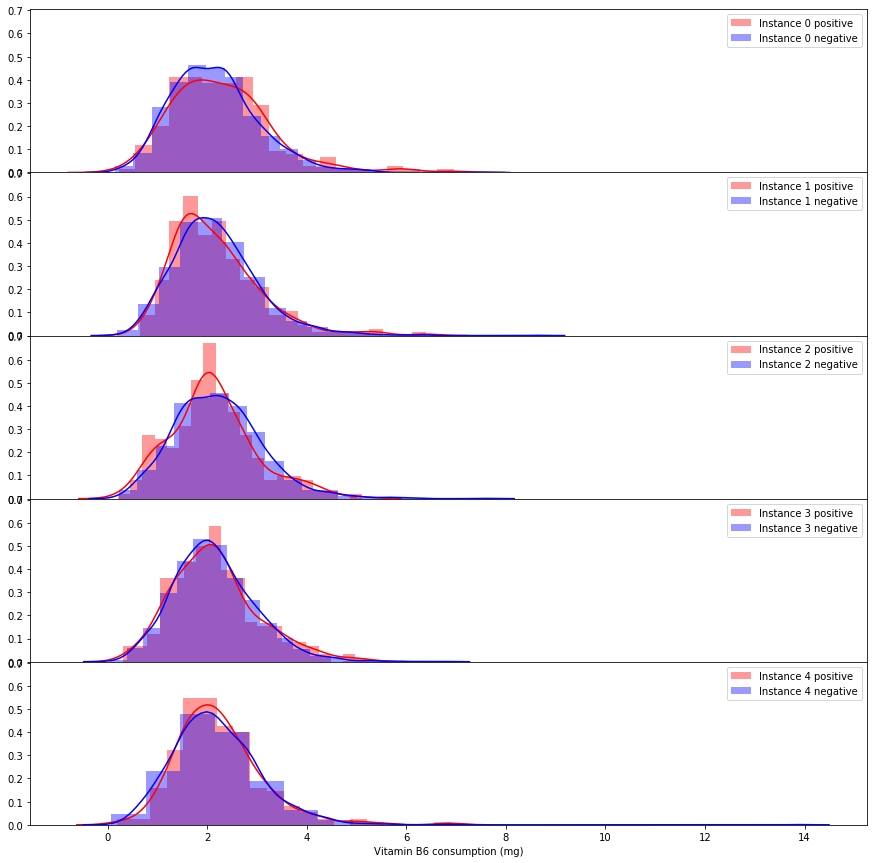

In [58]:
fig, axs = plt.subplots(5, figsize=(15,15), sharex=True, sharey=True, gridspec_kw={'hspace': 0})
sns.distplot(b6['100012-0.0'][b6['eid'].isin(eid_positive)],color='red', label='Instance 0 positive',hist=True,bins=20, ax=axs[0])
sns.distplot(b6['100012-0.0'][~b6['eid'].isin(eid_positive)], color='blue',label='Instance 0 negative',hist=True,bins=20, ax=axs[0])
axs[0].legend()
sns.distplot(b6['100012-1.0'][b6['eid'].isin(eid_positive)],color='red', label='Instance 1 positive',hist=True,bins=20, ax=axs[1])
sns.distplot(b6['100012-1.0'][~b6['eid'].isin(eid_positive)], color='blue',label='Instance 1 negative',hist=True,bins=20, ax=axs[1])
axs[1].legend()
sns.distplot(b6['100012-2.0'][b6['eid'].isin(eid_positive)],color='red', label='Instance 2 positive',hist=True,bins=20, ax=axs[2])
sns.distplot(b6['100012-2.0'][~b6['eid'].isin(eid_positive)], color='blue',label='Instance 2 negative',hist=True,bins=20, ax=axs[2])
axs[2].legend()
sns.distplot(b6['100012-3.0'][b6['eid'].isin(eid_positive)],color='red', label='Instance 3 positive',hist=True,bins=20, ax=axs[3])
sns.distplot(b6['100012-3.0'][~b6['eid'].isin(eid_positive)], color='blue',label='Instance 3 negative',hist=True,bins=20, ax=axs[3])
axs[3].legend()
sns.distplot(b6['100012-4.0'][b6['eid'].isin(eid_positive)],color='red', label='Instance 4 positive',hist=True,bins=20, ax=axs[4])
sns.distplot(b6['100012-4.0'][~b6['eid'].isin(eid_positive)], color='blue',label='Instance 4 negative',hist=True,bins=20, ax=axs[4])
axs[4].legend()
axs[4].set_xlabel('Vitamin B6 consumption (mg)')

#### Vitamin B12

In [59]:
b12 = vitamin1[['eid', '100013-0.0', '100013-1.0', '100013-2.0', '100013-3.0', '100013-4.0']]
b12.head()

,eid,100013-0.0,100013-1.0,100013-2.0,100013-3.0,100013-4.0
0,1000011,1.46,NaN,1.44,NaN,NaN
1,1001244,NaN,7.95,NaN,NaN,NaN
2,1001283,NaN,NaN,NaN,NaN,NaN
3,1001505,NaN,NaN,NaN,NaN,NaN
4,1001772,NaN,NaN,NaN,NaN,NaN


Text(0.5, 0, 'Vitamin B12 consumption (mg)')

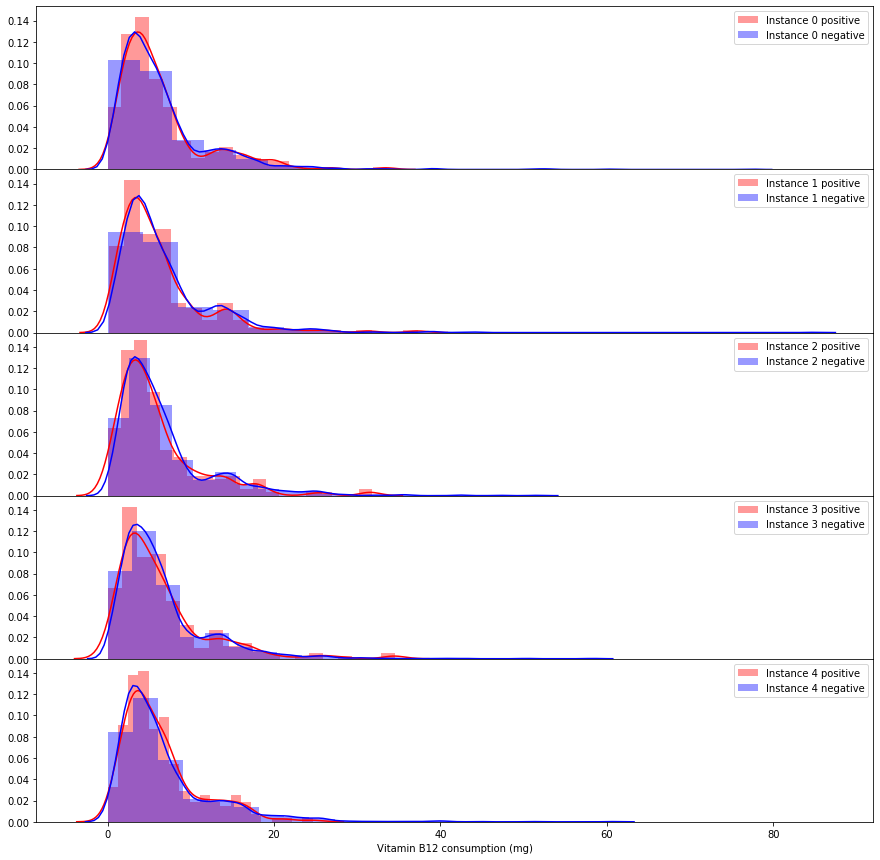

In [62]:
fig, axs = plt.subplots(5, figsize=(15,15), sharex=True, sharey=True, gridspec_kw={'hspace': 0})
sns.distplot(b12['100013-0.0'][b12['eid'].isin(eid_positive)],color='red', label='Instance 0 positive',hist=True,bins=20, ax=axs[0])
sns.distplot(b12['100013-0.0'][~b12['eid'].isin(eid_positive)], color='blue',label='Instance 0 negative',hist=True,bins=20, ax=axs[0])
axs[0].legend()
sns.distplot(b12['100013-1.0'][b12['eid'].isin(eid_positive)],color='red', label='Instance 1 positive',hist=True,bins=20, ax=axs[1])
sns.distplot(b12['100013-1.0'][~b12['eid'].isin(eid_positive)], color='blue',label='Instance 1 negative',hist=True,bins=20, ax=axs[1])
axs[1].legend()
sns.distplot(b12['100013-2.0'][b12['eid'].isin(eid_positive)],color='red', label='Instance 2 positive',hist=True,bins=20, ax=axs[2])
sns.distplot(b12['100013-2.0'][~b12['eid'].isin(eid_positive)], color='blue',label='Instance 2 negative',hist=True,bins=20, ax=axs[2])
axs[2].legend()
sns.distplot(b12['100013-3.0'][b12['eid'].isin(eid_positive)],color='red', label='Instance 3 positive',hist=True,bins=20, ax=axs[3])
sns.distplot(b12['100013-3.0'][~b12['eid'].isin(eid_positive)], color='blue',label='Instance 3 negative',hist=True,bins=20, ax=axs[3])
axs[3].legend()
sns.distplot(b12['100013-4.0'][b12['eid'].isin(eid_positive)],color='red', label='Instance 4 positive',hist=True,bins=20, ax=axs[4])
sns.distplot(b12['100013-4.0'][~b12['eid'].isin(eid_positive)], color='blue',label='Instance 4 negative',hist=True,bins=20, ax=axs[4])
axs[4].legend()
axs[4].set_xlabel('Vitamin B12 consumption (mg)')

#### Vitamin C

In [63]:
c = vitamin1[['eid', '100015-0.0', '100015-1.0', '100015-2.0', '100015-3.0', '100015-4.0']]
c.head()

,eid,100015-0.0,100015-1.0,100015-2.0,100015-3.0,100015-4.0
0,1000011,152.22,NaN,212.01,NaN,NaN
1,1001244,NaN,286.59,NaN,NaN,NaN
2,1001283,NaN,NaN,NaN,NaN,NaN
3,1001505,NaN,NaN,NaN,NaN,NaN
4,1001772,NaN,NaN,NaN,NaN,NaN


Text(0.5, 0, 'Vitamin C consumption (mg)')

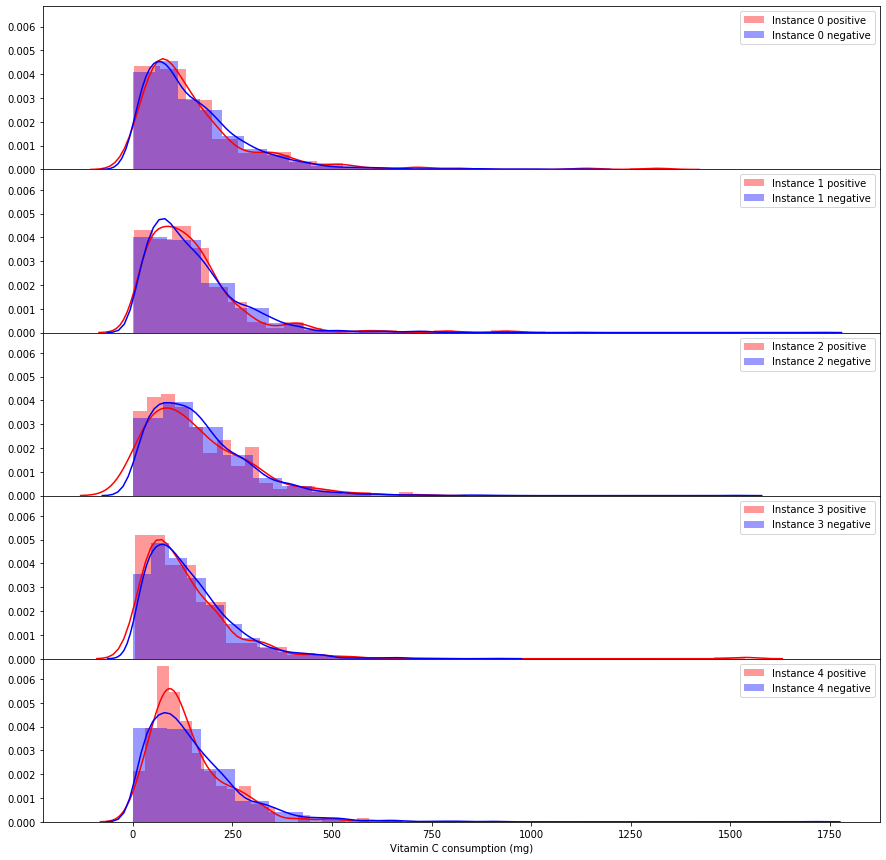

In [64]:
fig, axs = plt.subplots(5, figsize=(15,15), sharex=True, sharey=True, gridspec_kw={'hspace': 0})
sns.distplot(c['100015-0.0'][c['eid'].isin(eid_positive)],color='red', label='Instance 0 positive',hist=True,bins=20, ax=axs[0])
sns.distplot(c['100015-0.0'][~c['eid'].isin(eid_positive)], color='blue',label='Instance 0 negative',hist=True,bins=20, ax=axs[0])
axs[0].legend()
sns.distplot(c['100015-1.0'][c['eid'].isin(eid_positive)],color='red', label='Instance 1 positive',hist=True,bins=20, ax=axs[1])
sns.distplot(c['100015-1.0'][~c['eid'].isin(eid_positive)], color='blue',label='Instance 1 negative',hist=True,bins=20, ax=axs[1])
axs[1].legend()
sns.distplot(c['100015-2.0'][c['eid'].isin(eid_positive)],color='red', label='Instance 2 positive',hist=True,bins=20, ax=axs[2])
sns.distplot(c['100015-2.0'][~c['eid'].isin(eid_positive)], color='blue',label='Instance 2 negative',hist=True,bins=20, ax=axs[2])
axs[2].legend()
sns.distplot(c['100015-3.0'][c['eid'].isin(eid_positive)],color='red', label='Instance 3 positive',hist=True,bins=20, ax=axs[3])
sns.distplot(c['100015-3.0'][~c['eid'].isin(eid_positive)], color='blue',label='Instance 3 negative',hist=True,bins=20, ax=axs[3])
axs[3].legend()
sns.distplot(c['100015-4.0'][c['eid'].isin(eid_positive)],color='red', label='Instance 4 positive',hist=True,bins=20, ax=axs[4])
sns.distplot(c['100015-4.0'][~c['eid'].isin(eid_positive)], color='blue',label='Instance 4 negative',hist=True,bins=20, ax=axs[4])
axs[4].legend()
axs[4].set_xlabel('Vitamin C consumption (mg)')

#### Vitamin D

In [66]:
d = vitamin1[['eid', '100021-0.0', '100021-1.0', '100021-2.0', '100021-3.0', '100021-4.0']]
d.head()

,eid,100021-0.0,100021-1.0,100021-2.0,100021-3.0,100021-4.0
0,1000011,0.87,NaN,2.31,NaN,NaN
1,1001244,NaN,1.4,NaN,NaN,NaN
2,1001283,NaN,NaN,NaN,NaN,NaN
3,1001505,NaN,NaN,NaN,NaN,NaN
4,1001772,NaN,NaN,NaN,NaN,NaN


Text(0.5, 0, 'Vitamin D consumption (mg)')

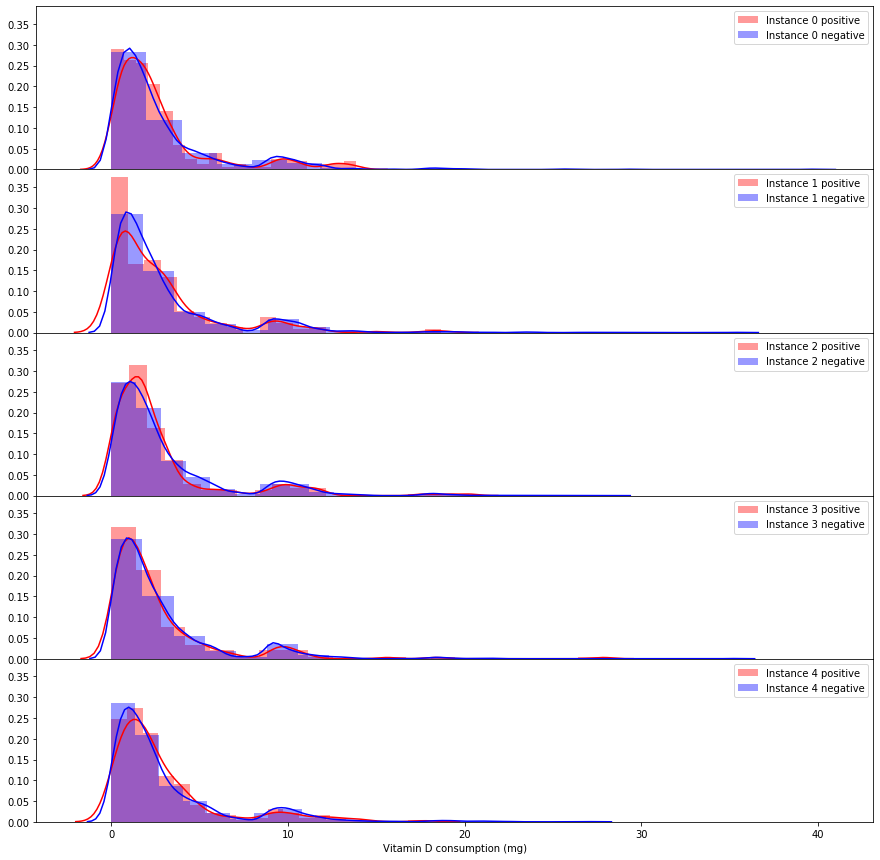

In [67]:
fig, axs = plt.subplots(5, figsize=(15,15), sharex=True, sharey=True, gridspec_kw={'hspace': 0})
sns.distplot(d['100021-0.0'][d['eid'].isin(eid_positive)],color='red', label='Instance 0 positive',hist=True,bins=20, ax=axs[0])
sns.distplot(d['100021-0.0'][~d['eid'].isin(eid_positive)], color='blue',label='Instance 0 negative',hist=True,bins=20, ax=axs[0])
axs[0].legend()
sns.distplot(d['100021-1.0'][d['eid'].isin(eid_positive)],color='red', label='Instance 1 positive',hist=True,bins=20, ax=axs[1])
sns.distplot(d['100021-1.0'][~d['eid'].isin(eid_positive)], color='blue',label='Instance 1 negative',hist=True,bins=20, ax=axs[1])
axs[1].legend()
sns.distplot(d['100021-2.0'][d['eid'].isin(eid_positive)],color='red', label='Instance 2 positive',hist=True,bins=20, ax=axs[2])
sns.distplot(d['100021-2.0'][~d['eid'].isin(eid_positive)], color='blue',label='Instance 2 negative',hist=True,bins=20, ax=axs[2])
axs[2].legend()
sns.distplot(d['100021-3.0'][d['eid'].isin(eid_positive)],color='red', label='Instance 3 positive',hist=True,bins=20, ax=axs[3])
sns.distplot(d['100021-3.0'][~d['eid'].isin(eid_positive)], color='blue',label='Instance 3 negative',hist=True,bins=20, ax=axs[3])
axs[3].legend()
sns.distplot(d['100021-4.0'][d['eid'].isin(eid_positive)],color='red', label='Instance 4 positive',hist=True,bins=20, ax=axs[4])
sns.distplot(d['100021-4.0'][~d['eid'].isin(eid_positive)], color='blue',label='Instance 4 negative',hist=True,bins=20, ax=axs[4])
axs[4].legend()
axs[4].set_xlabel('Vitamin D consumption (mg)')

#### Vitamin E

In [68]:
e = vitamin1[['eid', '100025-0.0', '100025-1.0', '100025-2.0', '100025-3.0', '100025-4.0']]
e.head()

,eid,100025-0.0,100025-1.0,100025-2.0,100025-3.0,100025-4.0
0,1000011,19.73,NaN,5.99,NaN,NaN
1,1001244,NaN,16.87,NaN,NaN,NaN
2,1001283,NaN,NaN,NaN,NaN,NaN
3,1001505,NaN,NaN,NaN,NaN,NaN
4,1001772,NaN,NaN,NaN,NaN,NaN


Text(0.5, 0, 'Vitamin E consumption (mg)')

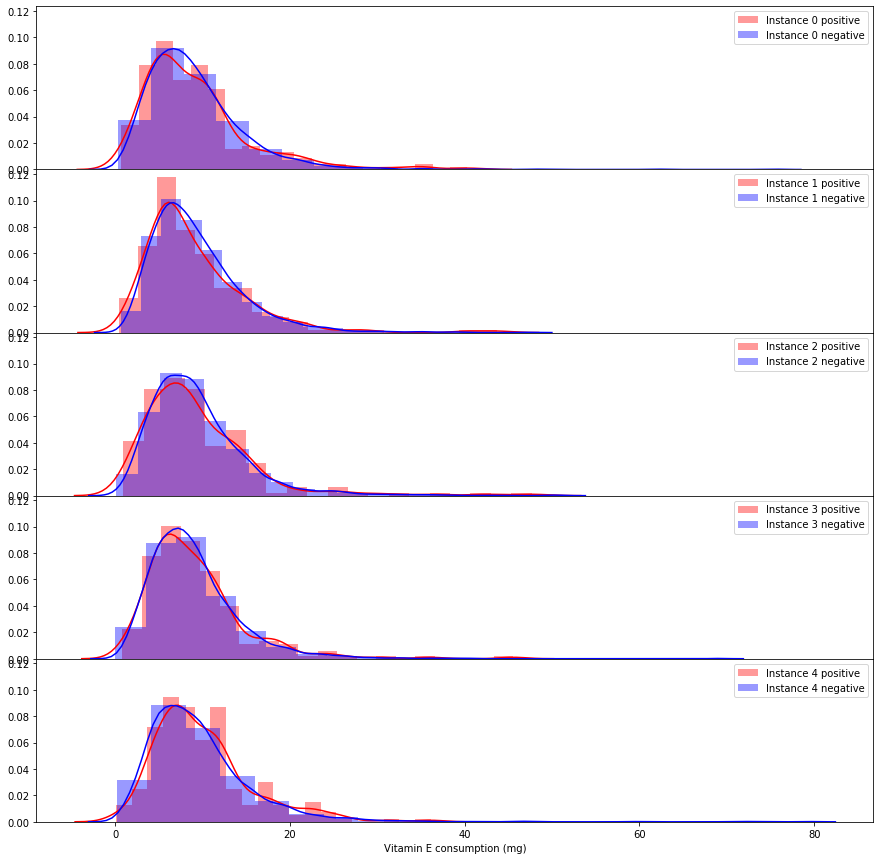

In [70]:
fig, axs = plt.subplots(5, figsize=(15,15), sharex=True, sharey=True, gridspec_kw={'hspace': 0})
sns.distplot(e['100025-0.0'][e['eid'].isin(eid_positive)],color='red', label='Instance 0 positive',hist=True,bins=20, ax=axs[0])
sns.distplot(e['100025-0.0'][~e['eid'].isin(eid_positive)], color='blue',label='Instance 0 negative',hist=True,bins=20, ax=axs[0])
axs[0].legend()
sns.distplot(e['100025-1.0'][e['eid'].isin(eid_positive)],color='red', label='Instance 1 positive',hist=True,bins=20, ax=axs[1])
sns.distplot(e['100025-1.0'][~e['eid'].isin(eid_positive)], color='blue',label='Instance 1 negative',hist=True,bins=20, ax=axs[1])
axs[1].legend()
sns.distplot(e['100025-2.0'][e['eid'].isin(eid_positive)],color='red', label='Instance 2 positive',hist=True,bins=20, ax=axs[2])
sns.distplot(e['100025-2.0'][~e['eid'].isin(eid_positive)], color='blue',label='Instance 2 negative',hist=True,bins=20, ax=axs[2])
axs[2].legend()
sns.distplot(e['100025-3.0'][e['eid'].isin(eid_positive)],color='red', label='Instance 3 positive',hist=True,bins=20, ax=axs[3])
sns.distplot(e['100025-3.0'][~e['eid'].isin(eid_positive)], color='blue',label='Instance 3 negative',hist=True,bins=20, ax=axs[3])
axs[3].legend()
sns.distplot(e['100025-4.0'][e['eid'].isin(eid_positive)],color='red', label='Instance 4 positive',hist=True,bins=20, ax=axs[4])
sns.distplot(e['100025-4.0'][~e['eid'].isin(eid_positive)], color='blue',label='Instance 4 negative',hist=True,bins=20, ax=axs[4])
axs[4].legend()
axs[4].set_xlabel('Vitamin E consumption (mg)')

#### Vitamin supplement user

In [71]:
sup = vitamin1[['eid', '104670-0.0', '104670-1.0', '104670-2.0', '104670-3.0', '104670-4.0']]
sup.head()

,eid,104670-0.0,104670-1.0,104670-2.0,104670-3.0,104670-4.0
0,1000011,0.0,NaN,0.0,NaN,NaN
1,1001244,NaN,1.0,NaN,NaN,NaN
2,1001283,NaN,NaN,NaN,NaN,NaN
3,1001505,NaN,NaN,NaN,NaN,NaN
4,1001772,NaN,NaN,NaN,NaN,NaN


In [ ]:
# boolean vs boolean plot?

In [ ]:
# I might need to think of a new way of plotting the result, the above vitamin distplots dont clearly show our desired outcomes.